# Logistic Regresion Norte del Cauca

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [4]:
path = 'dataset/datasetFinalTesisValle_NCauca.csv'
data = pd.read_csv(path)


Si se desea correr para 

76 => Valle del Cauca 

19 => Cauca

ó para todos quitar la condicion




In [5]:
df = data.loc[data['cod_dpto'] == 19].dropna(subset=['clasificacion_letter'])
#df = data.dropna(subset=['clasificacion_letter'])

In [6]:
print(df.head(3))

label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df['clasificacion_letter_numeric'] = df['clasificacion_letter'].map(label_mapping)

   cod_dpto  cod_mpio  cod_clase  cod_barrio  cod_vereda  cod_corregimiento  \
1        76     76109          3           0         218                  0   
2        76     76109          1      200256           0                  0   
3        76     76130          3           0           0                  8   

   cod_comuna  tot_viviendas  tot_hogares  tip_vivienda  ...  ind_estudia  \
1          99              0            1             1  ...            9   
2          99              0            1             1  ...            9   
3          99              0            1             1  ...            9   

   clasificacion_letter  sum_gastos  sum_ingresos  ide_ficha_origen_hogar  \
1                     A       80000             0  76109709887100001014-1   
2                     A           0             0  76109715785400001775-1   
3                     B      270000             0  76130612759600003331-1   

   max_nivel_educativo_en_hogar  alguien_hogar_empleado_o_similar

# Normalizar Columnas no Categoricas

In [7]:
#'ind_evento_avalancha','ind_evento_inundacion',

X = df[
    ['edad_calculada','cod_dpto', 'cod_mpio', 'cod_clase', 'cod_barrio', 'cod_vereda', 'cod_corregimiento', 'cod_comuna', 'tip_vivienda',
     'tip_mat_paredes', 'tip_mat_pisos', 'ind_tiene_energia', 'ind_tiene_gas', 'num_cuartos_exclusivos',
     'num_cuartos_unicos_dormir', 'tip_sanitario', 'tip_uso_sanitario', 'tip_origen_agua', 'tip_uso_agua_beber',
     'ind_tiene_cocina', 'tip_prepara_alimentos', 'tip_uso_cocina', 'tip_energia_cocina',
      'num_personas_hogar', 'num_habita_vivienda', 'ind_tiene_internet',
     'max_nivel_educativo_en_hogar', 'alguien_hogar_empleado_o_similar', 'alguien_hogar_cotiza_pension',
     'sum_ingresos_hogar', 'sum_gastos_hogar']]
y = df['clasificacion_letter_numeric']


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['sum_ingresos_hogar', 'sum_gastos_hogar']

X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])


/var/folders/vh/c65wsrm94x92d8rfk33vvpwr0000gn/T/ipykernel_1219/2214766882.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])


## Creacion del Modelo Base con columnas seleccionadas

/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimira

Mejores parámetros de búsqueda aleatoria: {'C': np.float64(7.430820019313862), 'class_weight': None, 'penalty': 'l2'}
Mejor puntuación de búsqueda aleatoria: 0.7589836683927533


/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimira

Mejores parámetros finales: {'C': np.float64(7.430820019313862), 'class_weight': None, 'penalty': 'l2'}
Mejor puntuación final: 0.7589836683927533
Accuracy: 0.7575014153613889

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     18725
           1       0.69      0.67      0.68     16954
           2       0.74      0.75      0.75     11031
           3       0.67      0.29      0.40       981

    accuracy                           0.76     47691
   macro avg       0.73      0.64      0.67     47691
weighted avg       0.75      0.76      0.75     47691



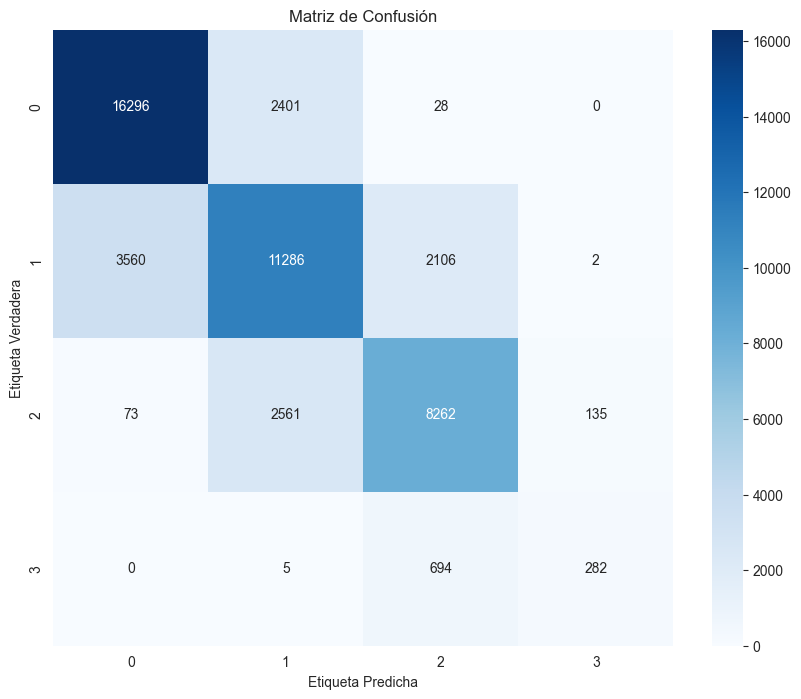

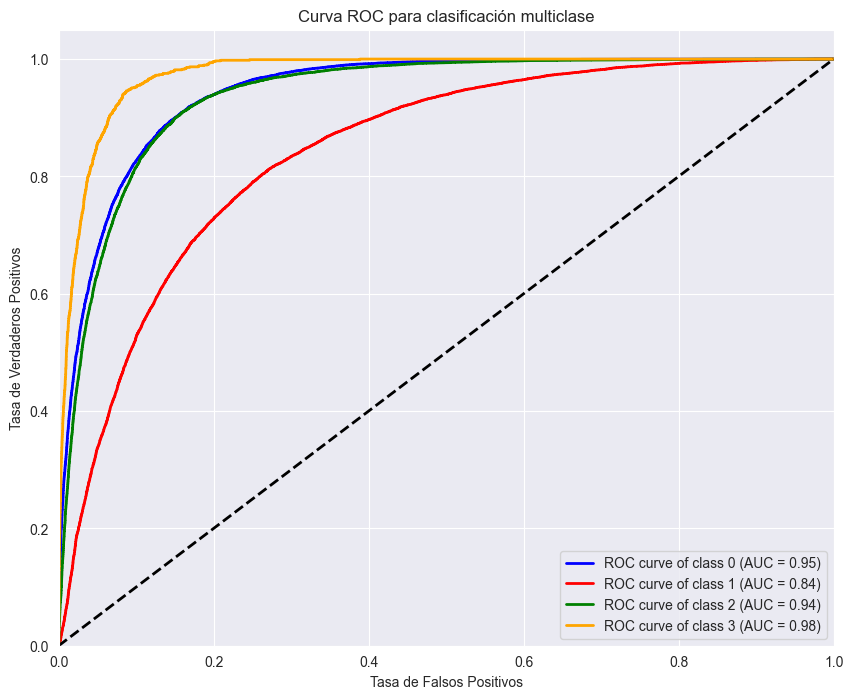

/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimira

Puntuaciones de validación cruzada: [0.75645428 0.75865594 0.76030718 0.76271231 0.75678863]
Media de validación cruzada: 0.7590 (+/- 0.0046)


/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimira

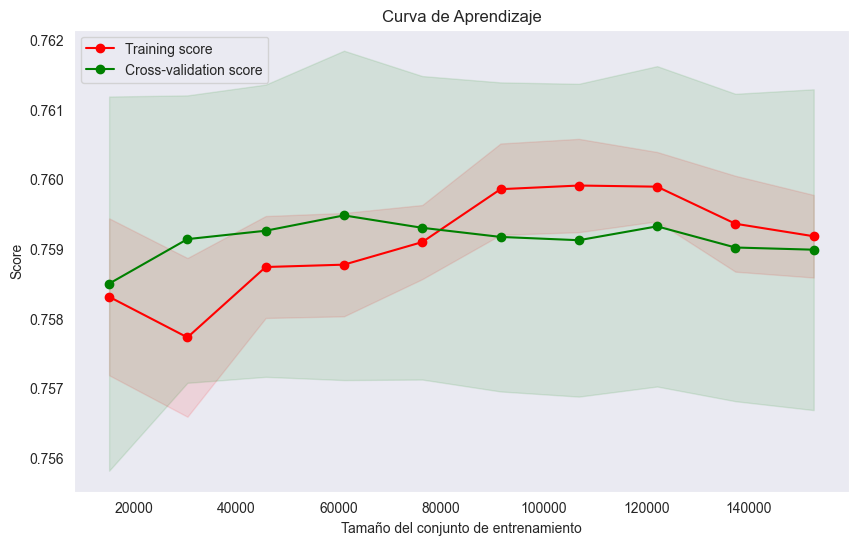

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, StratifiedKFold, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.inspection import permutation_importance
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, loguniform
import time


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de regresión logística multinomial
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Búsqueda aleatoria inicial de hiperparámetros
param_distributions = {
    'C': loguniform(1e-3, 1e3),
    'penalty': ['l2', 'none'],
    'class_weight': ['balanced', None]
}

random_search = RandomizedSearchCV(
    log_reg, param_distributions, n_iter=100, cv=5,
    scoring='accuracy', n_jobs=-1, random_state=42
)
random_search.fit(X_train_scaled, y_train)

print("Mejores parámetros de búsqueda aleatoria:", random_search.best_params_)
print("Mejor puntuación de búsqueda aleatoria:", random_search.best_score_)

# Búsqueda en cuadrícula refinada
best_params = random_search.best_params_
param_grid = {
    'C': [best_params['C'] / 10, best_params['C'], best_params['C'] * 10],
    'penalty': [best_params['penalty']],
    'class_weight': [best_params['class_weight']]
}

grid_search = GridSearchCV(
    log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print("Mejores parámetros finales:", grid_search.best_params_)
print("Mejor puntuación final:", grid_search.best_score_)

# Evaluación del modelo
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Curva ROC
y_test_bin = pd.get_dummies(y_test).values
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para clasificación multiclase')
plt.legend(loc="lower right")
plt.show()

# Validación Cruzada
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print(f"Puntuaciones de validación cruzada: {cv_scores}")
print(f"Media de validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()



# Pruebas adicionales

Log Loss: 0.5585
Cohen's Kappa Score: 0.6330
Balanced Accuracy Score: 0.6431


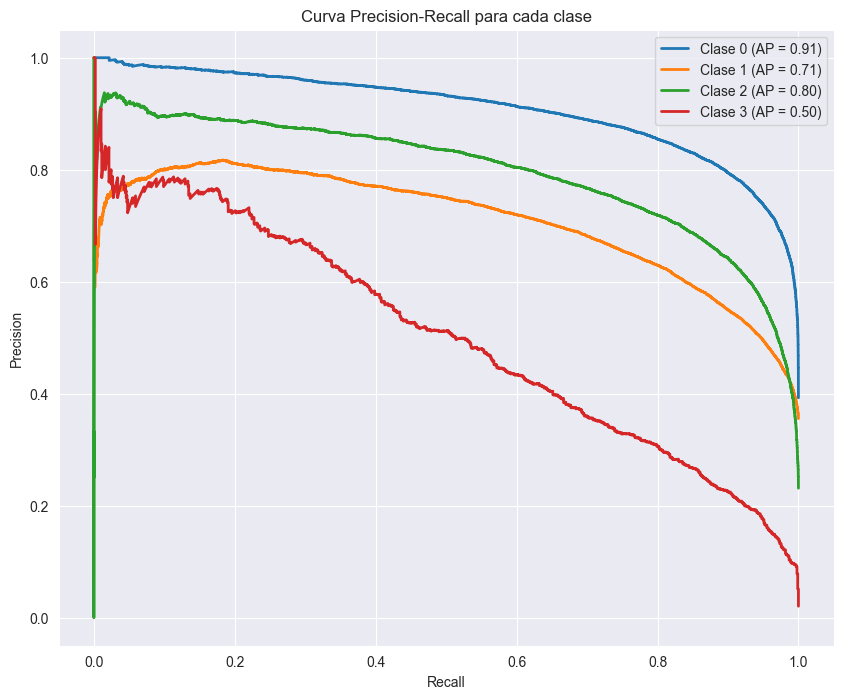

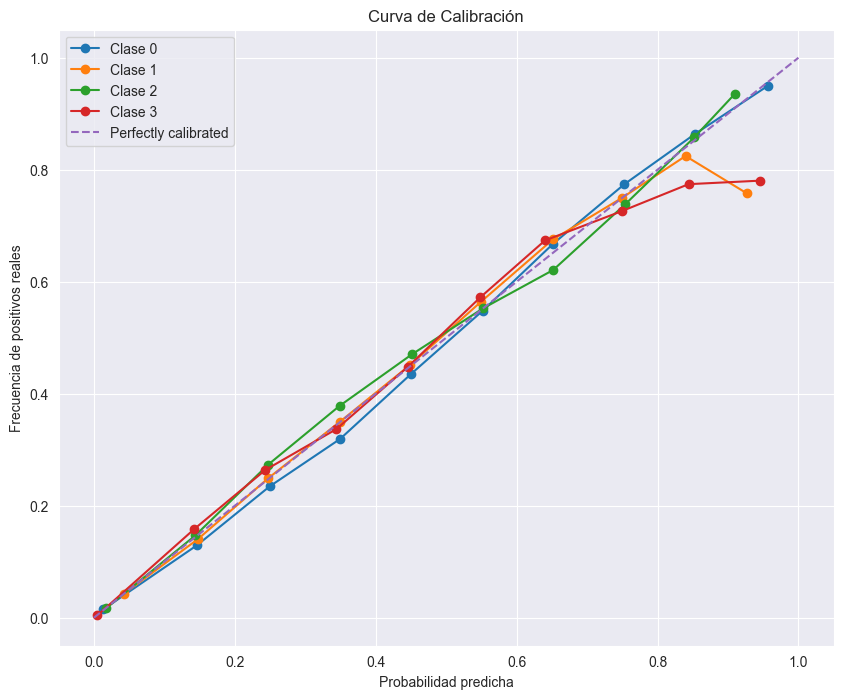

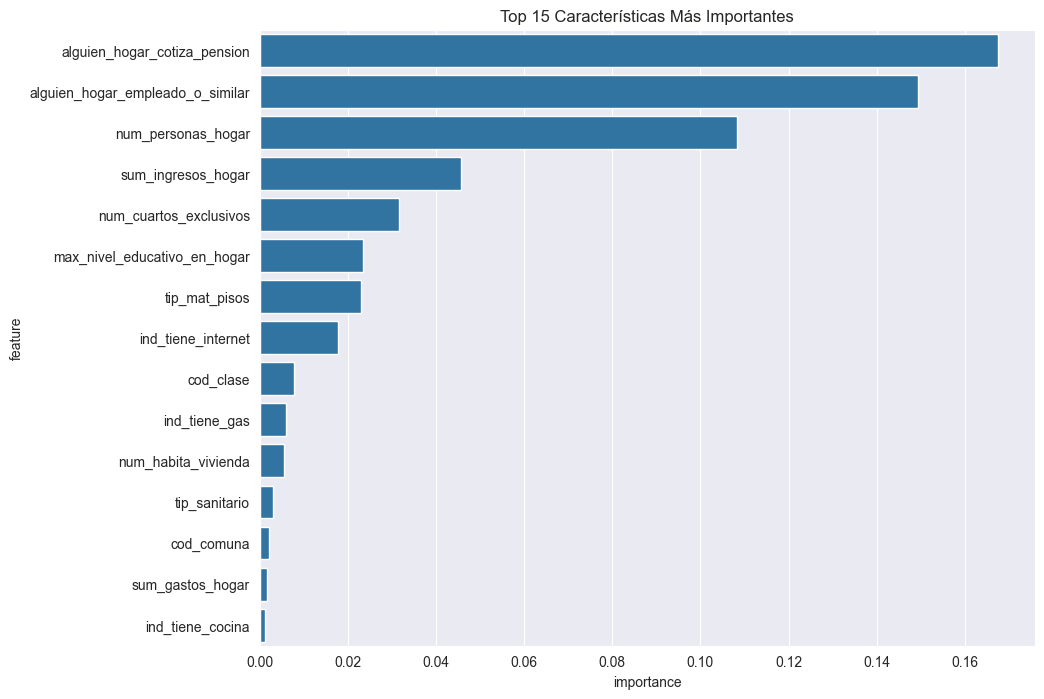

/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimiravila/Documents/Models/modelos-infancia/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/wladimira

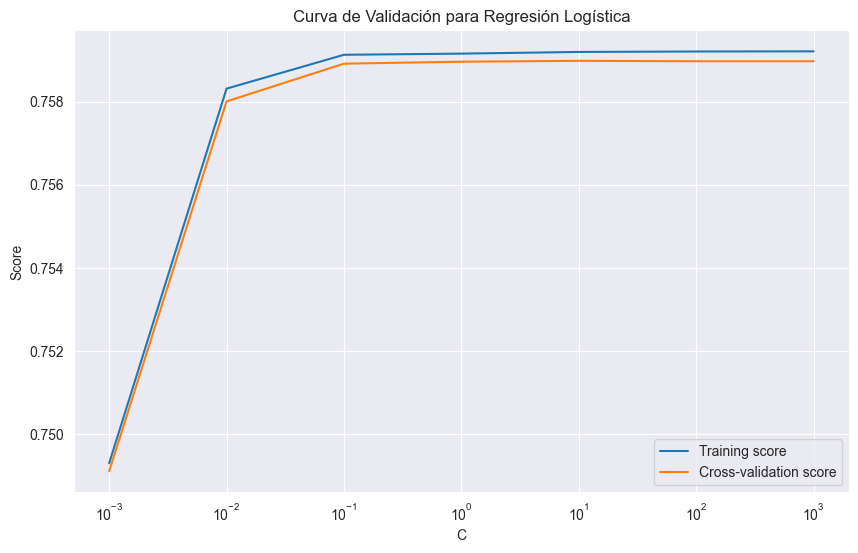

Resumen de instancias mal clasificadas:
       edad_calculada  cod_dpto      cod_mpio     cod_clase     cod_barrio  \
count    11565.000000   11565.0  11565.000000  11565.000000   11565.000000   
mean         2.353221      76.0  76233.661133      1.292348    9893.010808   
std          1.648876       0.0    293.234673      0.620374   52245.112349   
min          0.000000      76.0  76001.000000      1.000000       0.000000   
25%          1.000000      76.0  76001.000000      1.000000       6.000000   
50%          2.000000      76.0  76109.000000      1.000000     135.000000   
75%          4.000000      76.0  76400.000000      1.000000    1404.000000   
max          5.000000      76.0  76895.000000      3.000000  999999.000000   

         cod_vereda  cod_corregimiento    cod_comuna  tip_vivienda  \
count  11565.000000       11565.000000  11565.000000  11565.000000   
mean      44.303675           4.024557     47.413835      1.574319   
std      193.126913          14.433332     43.8

/var/folders/vh/c65wsrm94x92d8rfk33vvpwr0000gn/T/ipykernel_1219/266930057.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['true_label'] = y_test[y_pred != y_test]
/var/folders/vh/c65wsrm94x92d8rfk33vvpwr0000gn/T/ipykernel_1219/266930057.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['predicted_label'] = y_pred[y_pred != y_test]


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, StratifiedKFold, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, log_loss, brier_score_loss, cohen_kappa_score, balanced_accuracy_score
from sklearn.calibration import calibration_curve
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, loguniform
import time



# Log Loss (Pérdida logarítmica)
log_loss_score = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {log_loss_score:.4f}")


# Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa_score:.4f}")

# Balanced Accuracy Score
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {balanced_acc:.4f}")

# Precision-Recall Curve para cada clase
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    average_precision = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, lw=2,
             label=f'Clase {i} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para cada clase')
plt.legend(loc="best")
plt.show()

# Curva de calibración
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    prob_true, prob_pred = calibration_curve(y_test_bin[:, i], y_pred_proba[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Clase {i}')

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia de positivos reales')
plt.title('Curva de Calibración')
plt.legend()
plt.show()

# Importancia de características
importance = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance.importances_mean})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Características Más Importantes')
plt.show()

# Curva de validación para el hiperparámetro C
param_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(
    LogisticRegression(multi_class='multinomial', random_state=42),
    X_train_scaled, y_train, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.title("Curva de Validación para Regresión Logística")
plt.xlabel("C")
plt.ylabel("Score")
plt.semilogx(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.semilogx(param_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.legend(loc="best")
plt.show()



# Análisis de errores
misclassified = X_test[y_pred != y_test]
misclassified['true_label'] = y_test[y_pred != y_test]
misclassified['predicted_label'] = y_pred[y_pred != y_test]
print("Resumen de instancias mal clasificadas:")
print(misclassified.describe())



MAE: 0.1696
MSE: 0.0849
RMSE: 0.2914
Clase 0:
  MAE: 0.1830
  MSE: 0.0908
  RMSE: 0.3013
Clase 1:
  MAE: 0.3050
  MSE: 0.1531
  RMSE: 0.3913
Clase 2:
  MAE: 0.1635
  MSE: 0.0823
  RMSE: 0.2869
Clase 3:
  MAE: 0.0270
  MSE: 0.0135
  RMSE: 0.1161


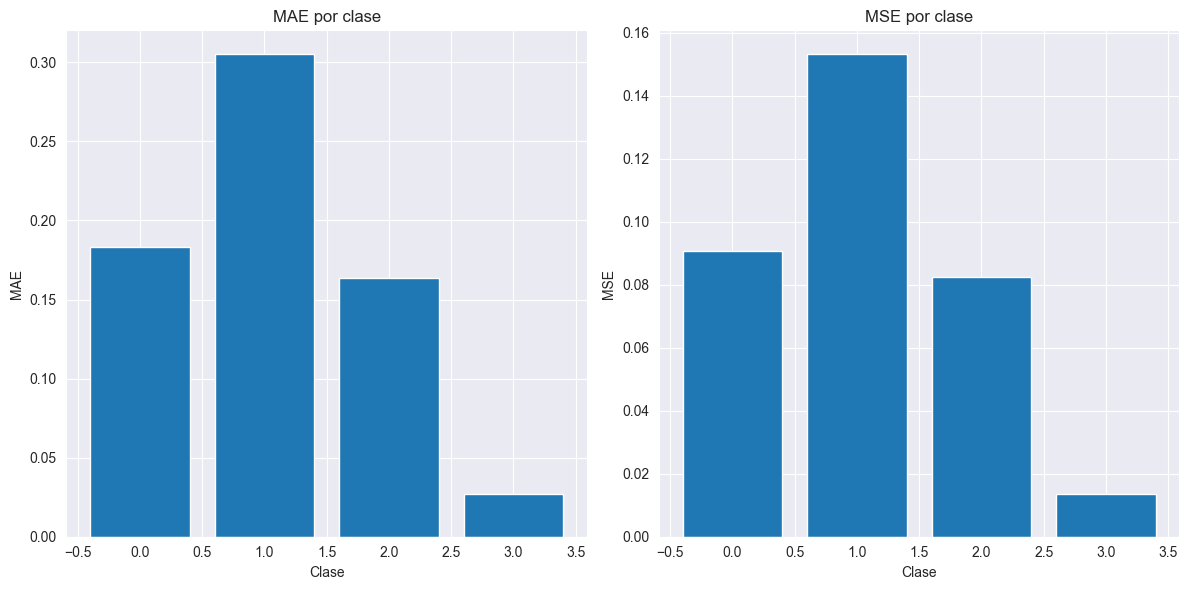

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



y_test_onehot = pd.get_dummies(y_test).values


mae = mean_absolute_error(y_test_onehot, y_pred_proba)
mse = mean_squared_error(y_test_onehot, y_pred_proba)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Calcular MAE y MSE para cada clase
for i in range(n_classes):
    mae_class = mean_absolute_error(y_test_onehot[:, i], y_pred_proba[:, i])
    mse_class = mean_squared_error(y_test_onehot[:, i], y_pred_proba[:, i])
    rmse_class = np.sqrt(mse_class)
    print(f"Clase {i}:")
    print(f"  MAE: {mae_class:.4f}")
    print(f"  MSE: {mse_class:.4f}")
    print(f"  RMSE: {rmse_class:.4f}")

# Visualización de MAE y MSE por clase
mae_by_class = [mean_absolute_error(y_test_onehot[:, i], y_pred_proba[:, i]) for i in range(n_classes)]
mse_by_class = [mean_squared_error(y_test_onehot[:, i], y_pred_proba[:, i]) for i in range(n_classes)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(n_classes), mae_by_class)
plt.title('MAE por clase')
plt.xlabel('Clase')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.bar(range(n_classes), mse_by_class)
plt.title('MSE por clase')
plt.xlabel('Clase')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()